#### Team Members:
   #### Anastasios Papazafeiropoulos       Tristan Hermanns

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# extra imports
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,  KFold, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  KFold, cross_val_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox

from time import time

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#dataset and Preprocessing
# Load the data into a pandas DataFrame
data = pd.read_csv("Breast_Cancer.csv", delimiter=',')
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
# Drop irrelevant columns
data.drop(['Survival Months'], axis=1, inplace=True)

In [5]:
#Treatment of mixed data types
# Convert categorical variables to numerical using LabelEncoder (alphabetical order)
le = LabelEncoder()
categorical_cols = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,23,0,Alive
1,50,2,1,1,1,2,0,2,1,35,1,1,13,4,Alive
2,58,2,0,2,2,4,0,2,1,63,1,1,13,6,Alive
3,58,2,1,0,0,0,1,3,1,18,1,1,1,0,Alive
4,47,2,1,1,0,1,1,3,1,41,1,1,2,0,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,0,0,Alive
4020,56,2,0,1,1,2,0,2,1,46,1,1,13,7,Alive
4021,68,2,1,1,0,1,0,2,1,22,1,0,10,2,Alive
4022,58,0,0,1,0,1,0,2,1,44,1,1,10,0,Alive


In [6]:
#encounter how many womens are dead
data.Status.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [7]:
#target value is the "Status" column
# Encode the "Status" column with Dead --> 1, Alive --> 0
data['Status'] = data['Status'].apply(lambda x: 1 if str(x) == 'Dead' else 0)
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,23,0,0
1,50,2,1,1,1,2,0,2,1,35,1,1,13,4,0
2,58,2,0,2,2,4,0,2,1,63,1,1,13,6,0
3,58,2,1,0,0,0,1,3,1,18,1,1,1,0,0
4,47,2,1,1,0,1,1,3,1,41,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,0,0,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,13,7,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,10,2,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,10,0,0


<AxesSubplot:>

array([<AxesSubplot:title={'center':'Age'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Tumor Size'}>], dtype=object)

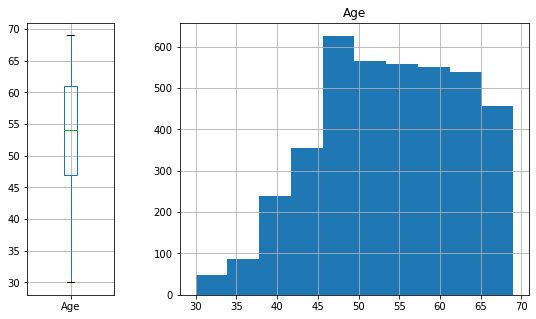

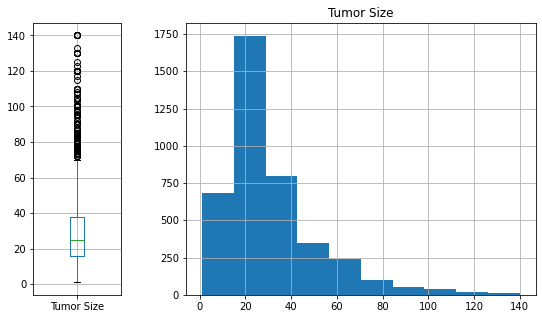

In [8]:
outliers_col = ['Age', 'Tumor Size']
for i in outliers_col:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    data.boxplot(column=i,ax=axes[0]);
    data.hist(column=i, ax=axes[1]);

In [9]:
for i in outliers_col:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    Q1, Q3, IQR

(47.0, 61.0, 14.0)

(16.0, 38.0, 22.0)

In [10]:
for i in outliers_col:
    small_outliers = data[i] < (Q1 - 1.5 * IQR)
    big_outliers = data[i] > (Q3 + 1.5 * IQR)

    sum(small_outliers), sum(big_outliers)

(0, 0)

(0, 222)

In [11]:
for i in outliers_col:
    data[i][small_outliers | big_outliers].head()

8     40
52    60
53    63
63    59
70    49
Name: Age, dtype: int64

8     103
52    120
53     77
63     75
70    130
Name: Tumor Size, dtype: int64

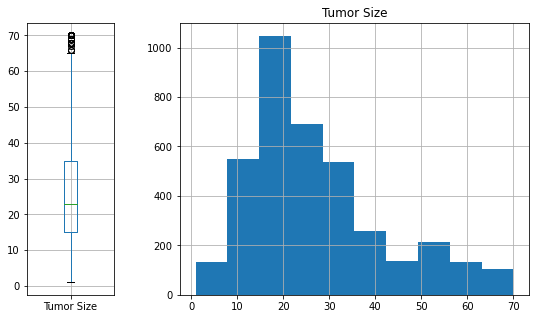

In [12]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
data[~(small_outliers | big_outliers)].boxplot(column=i,ax=axes[0]);
data[~(small_outliers | big_outliers)].hist(column=i, ax=axes[1]);

In [13]:
data = data[data['Tumor Size'] < Q3 + 1.5 * IQR]
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,23,0,0
1,50,2,1,1,1,2,0,2,1,35,1,1,13,4,0
2,58,2,0,2,2,4,0,2,1,63,1,1,13,6,0
3,58,2,1,0,0,0,1,3,1,18,1,1,1,0,0
4,47,2,1,1,0,1,1,3,1,41,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,0,0,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,13,7,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,10,2,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,10,0,0


In [14]:
# Split the data into features X and target y
X = data.drop(['Status'], axis=1)
y = data['Status']

In [15]:
# Split the data into training and testing sets (0.8 and 0.2 of the size of data, respectively)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Address class imbalance using class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [18]:
#useful
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
    return(TP, FP, TN, FN)

In [19]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    pred = pd.Series(pred)
    true = pd.Series(true)
    
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [20]:
#k-Fold Validation, k=5, for classifiers evaluation

metrics = ['F-score (cv)', 'Precision (cv)','Recall (cv)', 'Accuracy']

results_df = pd.DataFrame(index=[],
                          columns=['F-score (cv)', 'Precision (cv)','Recall (cv)', 'Accuracy'])

In [21]:
#Models:

#1: KNN classifier

#1.1: K=3:
knn_3_model = KNeighborsClassifier(n_neighbors=3)

init_time_knn3 = time()
# Train the KNN model
knn_3_model.fit(X_train_scaled, y_train)
training_time_knn3 = time()-init_time_knn3


# Make predictions using KNN model
knn_3_y_pred = knn_3_model.predict(X_test_scaled)

# Calculate evaluation metrics for KNN model
knn_3_accuracy = accuracy_score(y_test, knn_3_y_pred)
knn_3_precision = precision_score(y_test, knn_3_y_pred)
knn_3_recall = recall_score(y_test, knn_3_y_pred)
knn_3_f_score = f1_score(y_test, knn_3_y_pred)

print(classification_report(y_test, knn_3_y_pred))
#tp, fp, tn, fn = perf_measure(y_test, knn_3_y_pred)
#specificity = tn / (tn+fp)
cross_val_results = pd.DataFrame(cross_validate(knn_3_model , X_train_scaled, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['KNN-3',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['KNN-3','Time(s)'] = training_time_knn3

results_df.sort_values(by='Accuracy', ascending=False)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       661
           1       0.38      0.20      0.26       100

    accuracy                           0.85       761
   macro avg       0.63      0.58      0.59       761
weighted avg       0.82      0.85      0.83       761



,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387


In [22]:
#1.2: K=5:
knn_5_model = KNeighborsClassifier(n_neighbors=5)


init_time_knn5 = time()
# Train the KNN model
knn_5_model.fit(X_train_scaled, y_train)
training_time_knn5 = time()-init_time_knn5

# Make predictions using KNN model
knn_5_y_pred = knn_5_model.predict(X_test_scaled)

# Calculate evaluation metrics for KNN model
knn_5_accuracy = accuracy_score(y_test, knn_5_y_pred)
knn_5_precision = precision_score(y_test, knn_5_y_pred)
knn_5_recall = recall_score(y_test, knn_5_y_pred)
knn_5_f_score = f1_score(y_test, knn_5_y_pred)

print(classification_report(y_test, knn_5_y_pred))

cross_val_results = pd.DataFrame(cross_validate(knn_5_model , X_train_scaled, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['KNN-5',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['KNN-5','Time(s)'] = training_time_knn5

results_df.sort_values(by='Accuracy', ascending=False)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       661
           1       0.51      0.19      0.28       100

    accuracy                           0.87       761
   macro avg       0.70      0.58      0.60       761
weighted avg       0.84      0.87      0.84       761



,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
KNN-5,0.54828,0.614632,0.5444,0.836566,0.008242
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387


In [23]:
#1.3: K=15:
knn_15_model = KNeighborsClassifier(n_neighbors=15)

init_time_knn15 = time()
# Train the KNN model
knn_15_model.fit(X_train_scaled, y_train)
training_time_knn15 = time()-init_time_knn15

# Make predictions using KNN model
knn_15_y_pred = knn_15_model.predict(X_test_scaled)

# Calculate evaluation metrics for KNN model
knn_15_accuracy = accuracy_score(y_test, knn_15_y_pred)
knn_15_precision = precision_score(y_test, knn_15_y_pred)
knn_15_recall = recall_score(y_test, knn_15_y_pred)
knn_15_f_score = f1_score(y_test, knn_15_y_pred)

print(classification_report(y_test, knn_15_y_pred))

cross_val_results = pd.DataFrame(cross_validate(knn_15_model , X_train_scaled, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['KNN-15',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['KNN-15','Time(s)'] = training_time_knn15

results_df.sort_values(by='Accuracy', ascending=False)

KNeighborsClassifier(n_neighbors=15)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       661
           1       0.54      0.07      0.12       100

    accuracy                           0.87       761
   macro avg       0.71      0.53      0.53       761
weighted avg       0.83      0.87      0.82       761



,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
KNN-15,0.509218,0.662048,0.522577,0.848734,0.010908
KNN-5,0.54828,0.614632,0.5444,0.836566,0.008242
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387


In [24]:
# Create the logistic regression model
lr_model = LogisticRegression()

init_time_lr = time()
# Train the logistic regression model
lr_model.fit(X_train_scaled, y_train)
training_time_lr = time()-init_time_lr

# Make predictions using logistic regression model
lr_y_pred = lr_model.predict(X_test_scaled)

# Calculate evaluation metrics for logistic regression model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f_score = f1_score(y_test, lr_y_pred)


print(classification_report(y_test, lr_y_pred))

cross_val_results = pd.DataFrame(cross_validate(lr_model , X_train_scaled, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['Logistic Regression','Time(s)'] = training_time_lr

results_df.sort_values(by='Accuracy', ascending=False)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       661
           1       0.60      0.12      0.20       100

    accuracy                           0.87       761
   macro avg       0.74      0.55      0.57       761
weighted avg       0.84      0.87      0.84       761



,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
Logistic Regression,0.550065,0.732945,0.546754,0.855969,0.043566
KNN-15,0.509218,0.662048,0.522577,0.848734,0.010908
KNN-5,0.54828,0.614632,0.5444,0.836566,0.008242
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387


In [25]:
#MLP

#logistic-sigmoid
model_MLP_sigmoid = MLPClassifier(hidden_layer_sizes=[2,2,2],
                           alpha=0.001,
                           activation='logistic',
                           max_iter=1000,
                           solver='lbfgs',random_state=42)
model_MLP_sigmoid.fit(X_train,y_train);

init_time_mlp_sig = time()
# Train the MLP model
model_MLP_sigmoid.fit(X_train_scaled, y_train)
training_time_mlp_sig = time()-init_time_mlp_sig

mlp_sig_y_pred = model_MLP_sigmoid.predict(X_test_scaled)

# Calculate evaluation metrics for logistic regression model
mlp_sig_accuracy = accuracy_score(y_test, mlp_sig_y_pred)
mlp_sig_precision = precision_score(y_test, mlp_sig_y_pred, zero_division=1)
mlp_sig_recall = recall_score(y_test, mlp_sig_y_pred, zero_division=1)
mlp__sig_f_score = f1_score(y_test, mlp_sig_y_pred)

print(classification_report(y_test, mlp_sig_y_pred, zero_division=1))

cross_val_results = pd.DataFrame(cross_validate(knn_3_model , X_train_scaled, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP-sigmoid',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['MLP-sigmoid','Time(s)'] = training_time_mlp_sig

results_df.sort_values(by='Accuracy', ascending=False)



#relu
model_MLP_relu = MLPClassifier(hidden_layer_sizes=[2,2,2],
                           alpha=0.001,
                           activation='relu',
                           max_iter=1000,
                           solver='lbfgs',random_state=42)
model_MLP_relu.fit(X_train,y_train);

init_time_relu = time()
# Train the MLP model
model_MLP_relu.fit(X_train_scaled, y_train)
training_time_relu = time()-init_time_relu


mlp_relu_y_pred = model_MLP_relu.predict(X_test_scaled)

# Calculate evaluation metrics for relu model
mlp_relu_accuracy = accuracy_score(y_test, mlp_relu_y_pred)
mlp_relu_precision = precision_score(y_test, mlp_relu_y_pred,zero_division = 0)
mlp_relu_recall = recall_score(y_test, mlp_relu_y_pred, zero_division=1)
mlp_relu_f_score = f1_score(y_test, mlp_relu_y_pred)

print(classification_report(y_test, mlp_relu_y_pred,zero_division = 0))

cross_val_results = pd.DataFrame(cross_validate(model_MLP_relu , X_train_scaled, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP-relu',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['MLP-relu','Time(s)'] = training_time_relu

results_df.sort_values(by='Accuracy', ascending=False)

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=[2, 2, 2],
              max_iter=1000, random_state=42, solver='lbfgs')

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=[2, 2, 2],
              max_iter=1000, random_state=42, solver='lbfgs')

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       661
           1       0.00      0.00      0.00       100

    accuracy                           0.87       761
   macro avg       0.43      0.50      0.46       761
weighted avg       0.75      0.87      0.81       761



,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
Logistic Regression,0.550065,0.732945,0.546754,0.855969,0.043566
KNN-15,0.509218,0.662048,0.522577,0.848734,0.010908
KNN-5,0.54828,0.614632,0.5444,0.836566,0.008242
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387
MLP-sigmoid,0.552718,0.583192,0.547026,0.819467,0.374980


MLPClassifier(alpha=0.001, hidden_layer_sizes=[2, 2, 2], max_iter=1000,
              random_state=42, solver='lbfgs')

MLPClassifier(alpha=0.001, hidden_layer_sizes=[2, 2, 2], max_iter=1000,
              random_state=42, solver='lbfgs')

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       661
           1       0.00      0.00      0.00       100

    accuracy                           0.87       761
   macro avg       0.43      0.50      0.46       761
weighted avg       0.75      0.87      0.81       761



/home/tasos/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasos/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasos/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasos/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classi

,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
Logistic Regression,0.550065,0.732945,0.546754,0.855969,0.043566
MLP-relu,0.45957,0.425189,0.5,0.850378,0.015791
KNN-15,0.509218,0.662048,0.522577,0.848734,0.010908
KNN-5,0.54828,0.614632,0.5444,0.836566,0.008242
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387
MLP-sigmoid,0.552718,0.583192,0.547026,0.819467,0.374980


In [26]:
#Gaussian Naive Bayes
gnb_model = GaussianNB()

init_time_gnb = time()
#training
gnb_y_pred = gnb_model.fit(X_train_scaled, y_train).predict(X_test_scaled)
training_time_gnb = time()-init_time_gnb

print(classification_report(y_test, gnb_y_pred))
#confusion(y_test,gnb_y_pred)

cross_val_results = pd.DataFrame(cross_validate(gnb_model , X_train_scaled, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Gaussian Naive Bayes',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['Gaussian Naive Bayes','Time(s)'] = training_time_gnb

results_df.sort_values(by='Accuracy', ascending=False)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       661
           1       0.34      0.39      0.36       100

    accuracy                           0.82       761
   macro avg       0.62      0.64      0.63       761
weighted avg       0.83      0.82      0.82       761



,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
Logistic Regression,0.550065,0.732945,0.546754,0.855969,0.043566
MLP-relu,0.45957,0.425189,0.5,0.850378,0.015791
KNN-15,0.509218,0.662048,0.522577,0.848734,0.010908
KNN-5,0.54828,0.614632,0.5444,0.836566,0.008242
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387
MLP-sigmoid,0.552718,0.583192,0.547026,0.819467,0.374980
Gaussian Naive Bayes,0.618122,0.612956,0.625279,0.795461,0.002538


In [27]:
#PCA
pca = PCA().fit(X_train_scaled)

n_components =(pca.explained_variance_ratio_.cumsum() < 0.99).sum()
#n_components

pca = PCA(n_components=n_components).fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [28]:
init_time_lr_pca = time()
#training
lr_model.fit(X_train_pca, y_train)
training_time_lr_pca = time()-init_time_lr_pca

#Logistic Regression with PAC

# Train the logistic regression model
lr_model.fit(X_train_pca, y_train)

# Make predictions using logistic regression model
lr_y_pred_pca = lr_model.predict(X_test_pca)

# Calculate evaluation metrics for logistic regression model
lr_accuracy_pca = accuracy_score(y_test, lr_y_pred)
lr_precision_pca = precision_score(y_test, lr_y_pred)
lr_recall_pca = recall_score(y_test, lr_y_pred)
lr_f_score_pca = f1_score(y_test, lr_y_pred)


print(classification_report(y_test, lr_y_pred_pca))

cross_val_results = pd.DataFrame(cross_validate(lr_model , X_train_pca, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression-PCA',metrics] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.loc['Logistic Regression-PCA','Time(s)'] = training_time_lr_pca

results_df.sort_values(by='Accuracy', ascending=False)

LogisticRegression()

LogisticRegression()

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       661
           1       0.53      0.09      0.15       100

    accuracy                           0.87       761
   macro avg       0.70      0.54      0.54       761
weighted avg       0.83      0.87      0.83       761



,F-score (cv),Precision (cv),Recall (cv),Accuracy,Time(s)
Logistic Regression,0.550065,0.732945,0.546754,0.855969,0.043566
Logistic Regression-PCA,0.538643,0.731794,0.539835,0.854981,0.032149
MLP-relu,0.45957,0.425189,0.5,0.850378,0.015791
KNN-15,0.509218,0.662048,0.522577,0.848734,0.010908
KNN-5,0.54828,0.614632,0.5444,0.836566,0.008242
KNN-3,0.552718,0.583192,0.547026,0.819467,0.020387
MLP-sigmoid,0.552718,0.583192,0.547026,0.819467,0.374980
Gaussian Naive Bayes,0.618122,0.612956,0.625279,0.795461,0.002538
